<a href="https://colab.research.google.com/github/ankit-verma2000/OLA---Ensemble-Learning/blob/main/OLA_Ensemble_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## Project Title:  OLA - Ensemble Learning


# Problem Statement


- Recruiting and retaining drivers is seen by industry watchers as a tough battle for Ola.
- Churn among drivers is high and it’s very easy for drivers to stop working for the service on the fly or jump to Uber depending on the rates.


- As the companies get bigger, the high churn could become a bigger problem. To find new drivers, Ola is casting a wide net, including people who don’t have cars for jobs. But this acquisition is really costly.
- Losing drivers frequently impacts the morale of the organization and acquiring new drivers is more expensive than retaining existing ones.


- You are working as a data scientist with the Analytics Department of Ola, focused on driver team attrition.
- You are provided with the monthly information for a segment of drivers for 2019 and 2020 and tasked to predict whether a driver will be leaving the company or not based on their attributes like

- Demographics (city, age, gender etc.)
- Tenure information (joining date, Last Date)

- Historical data regarding the performance of the driver (Quarterly rating, Monthly business acquired, grade, Income)



### Column Profiling:


- MMMM-YY : Reporting Date (Monthly)
- Driver_ID : Unique id for drivers
- Age : Age of the driver
- Gender : Gender of the driver – Male : 0, Female: 1
- City : City Code of the driver
- Education_Level : Education level – 0 for 10+ ,1 for 12+ ,2 for graduate
- Income : Monthly average Income of the driver
- Date Of Joining : Joining date for the driver
- LastWorkingDate : Last date of working for the driver
- Joining Designation : Designation of the driver at the time of joining
- Grade : Grade of the driver at the time of reporting
- Total Business Value : The total business value acquired by the driver in a month (negative business indicates -cancellation/refund or car EMI adjustments)
- Quarterly Rating : Quarterly rating of the driver: 1,2,3,4,5 (higher is better)
   

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import figure

import statsmodels.api as sm
from scipy.stats import norm
from scipy.stats import t

In [ ]:
ola = pd.read_csv("ola_driver_scaler.csv")

In [ ]:
ola.head(5)

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [ ]:
df = ola.copy()

## Missing values checK :

In [ ]:
(df.isna().sum()/len(df))*100

Unnamed: 0               0.000000
MMM-YY                   0.000000
Driver_ID                0.000000
Age                      0.319305
Gender                   0.272194
City                     0.000000
Education_Level          0.000000
Income                   0.000000
Dateofjoining            0.000000
LastWorkingDate         91.541039
Joining Designation      0.000000
Grade                    0.000000
Total Business Value     0.000000
Quarterly Rating         0.000000
dtype: float64

In [ ]:
df.head(10)

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
5,5,12/01/19,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
6,6,01/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
7,7,02/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
8,8,03/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,350000,1
9,9,04/01/20,4,43.0,0.0,C13,2,65603,12/07/19,27/04/20,2,2,0,1


In [ ]:
df.shape

(19104, 14)

In [ ]:
df["Driver_ID"].nunique()  # 2381 drivers data.


2381

In [ ]:
df.drop(["Unnamed: 0"],axis = 1 , inplace=True)

In [ ]:
df["Gender"].replace({0.0:"Male",1.0:"Female"},inplace=True)

## Analysing structure of given Data :

In [ ]:
df[df["Driver_ID"]==25]

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
114,01/01/19,25,29.0,Male,C24,1,102077,30/10/17,NaN,1,3,2552300,3
115,02/01/19,25,29.0,Male,C24,1,102077,30/10/17,NaN,1,3,2143680,3
116,03/01/19,25,29.0,Male,C24,1,102077,30/10/17,NaN,1,3,2925260,3
117,04/01/19,25,29.0,Male,C24,1,102077,30/10/17,NaN,1,3,1030790,4
118,05/01/19,25,29.0,Male,C24,1,102077,30/10/17,NaN,1,3,1833580,4
119,06/01/19,25,29.0,Male,C24,1,102077,30/10/17,NaN,1,3,999610,4
120,07/01/19,25,29.0,Male,C24,1,102077,30/10/17,NaN,1,3,1046670,4
121,08/01/19,25,29.0,Male,C24,1,102077,30/10/17,NaN,1,3,677050,4
122,09/01/19,25,29.0,Male,C24,1,102077,30/10/17,NaN,1,3,1934570,4
123,10/01/19,25,29.0,Male,C24,1,102077,30/10/17,NaN,1,3,1297810,4


## Restructuring the data by aggregation :

In [ ]:
agg_df = df.groupby('Driver_ID').agg({
    'MMM-YY': 'first',
    'Age': 'max',
    'Gender': 'first',
    'City': 'first',
    'Education_Level': 'max',
    'Income': np.mean,
    'Dateofjoining': 'first',
    'LastWorkingDate': lambda x: x.dropna().iloc[0] if not x.dropna().empty else None,
    'Joining Designation': 'max',
    'Grade': 'max',
    'Total Business Value': 'sum',
    'Quarterly Rating': np.mean
})
agg_df.head()

,MMM-YY,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
Driver_ID,,,,,,,,,,,,
1,01/01/19,28.0,Male,C23,2,57387.0,24/12/18,03/11/19,1,1,1715580,2.0
2,11/01/20,31.0,Male,C7,2,67016.0,11/06/20,None,2,2,0,1.0
4,12/01/19,43.0,Male,C13,2,65603.0,12/07/19,27/04/20,2,2,350000,1.0
5,01/01/19,29.0,Male,C9,0,46368.0,01/09/19,03/07/19,1,1,120360,1.0
6,08/01/20,31.0,Female,C11,1,78728.0,31/07/20,None,3,3,1265000,1.6


In [ ]:
agg_df = agg_df.reset_index()


In [ ]:
final_data = agg_df.rename(columns={"MMM-YY":"No_of_Records",
                      "Dateofjoining":"Date_of_joining",
                      "Joining Designation":"Joining_Designation",
                      "Total Business Value" : "Total_Business_Value",
                      "Quarterly Rating":"Quarterly_Rating"})

In [ ]:
final_data

,Driver_ID,No_of_Records,Age,Gender,City,Education_Level,Income,Date_of_joining,LastWorkingDate,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating
0,1,01/01/19,28.0,Male,C23,2,57387.0,24/12/18,03/11/19,1,1,1715580,2.000000
1,2,11/01/20,31.0,Male,C7,2,67016.0,11/06/20,None,2,2,0,1.000000
2,4,12/01/19,43.0,Male,C13,2,65603.0,12/07/19,27/04/20,2,2,350000,1.000000
3,5,01/01/19,29.0,Male,C9,0,46368.0,01/09/19,03/07/19,1,1,120360,1.000000
4,6,08/01/20,31.0,Female,C11,1,78728.0,31/07/20,None,3,3,1265000,1.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,01/01/19,34.0,Male,C24,0,82815.0,15/10/15,None,2,3,21748820,2.625000
2377,2785,08/01/20,34.0,Female,C9,0,12105.0,28/08/20,28/10/20,1,1,0,1.000000
2378,2786,01/01/19,45.0,Male,C19,0,35370.0,31/07/18,22/09/19,2,2,2815090,1.666667
2379,2787,01/01/19,28.0,Female,C20,2,69498.0,21/07/18,20/06/19,1,1,977830,1.500000


In [ ]:
final_data = pd.merge(left = df.groupby(["Driver_ID"])["LastWorkingDate"].unique().apply(lambda x:x[-1]),
        right = final_data,
         on = "Driver_ID",
         how="outer"
    )

In [ ]:
final_data = pd.merge(left = df.groupby(["Driver_ID"])["Gender"].unique().apply(lambda x:x[-1]),
        right = final_data,
         on = "Driver_ID",
         how="outer"
    )

In [ ]:
data = final_data.copy()

In [ ]:
data["Gender"] = data["Gender_x"]


In [ ]:
#data["LastWorkingDate_y"] = data["Gender_x"]

In [ ]:
data["Gender"].value_counts()

Gender
Male      1380
Female     956
Name: count, dtype: int64

In [ ]:
data.head()

,Driver_ID,Gender_x,LastWorkingDate_x,No_of_Records,Age,Gender_y,City,Education_Level,Income,Date_of_joining,LastWorkingDate_y,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating,Gender
0,1,Male,03/11/19,01/01/19,28.0,Male,C23,2,57387.0,24/12/18,03/11/19,1,1,1715580,2.0,Male
1,2,Male,NaN,11/01/20,31.0,Male,C7,2,67016.0,11/06/20,None,2,2,0,1.0,Male
2,4,Male,27/04/20,12/01/19,43.0,Male,C13,2,65603.0,12/07/19,27/04/20,2,2,350000,1.0,Male
3,5,Male,03/07/19,01/01/19,29.0,Male,C9,0,46368.0,01/09/19,03/07/19,1,1,120360,1.0,Male
4,6,Female,NaN,08/01/20,31.0,Female,C11,1,78728.0,31/07/20,None,3,3,1265000,1.6,Female


## Target variable creation:
- ### target which tells whether the driver has left the company- driver whose last working day is present will have the value 1

In [ ]:
pd.Series(np.where(data["LastWorkingDate_y"].isna(),0,1)).value_counts()

1    1616
0     765
Name: count, dtype: int64

In [ ]:
data["Churn"] = data["LastWorkingDate_y"].fillna(0)

In [ ]:
def apply_0_1(y):
    if y == 0:
        return 0
    if y != 0:
        return 1


In [ ]:
data["Churn"] = data["Churn"].apply(apply_0_1)

In [ ]:
data["Churn"].value_counts()

Churn
1    1616
0     765
Name: count, dtype: int64

In [ ]:
data["Churn"].value_counts(normalize=True)*100

Churn
1    67.870643
0    32.129357
Name: proportion, dtype: float64

- ###  class 1 is the driviers who churned . 68%
- ###  class 0 is the driviers who have not churned . 32%

- ### Data is imbalanced

#### Converting date columns into Datatime format :

In [ ]:
data["Date_of_joining"] = pd.to_datetime(data["Date_of_joining"])
data["LastWorkingDate_y"] = pd.to_datetime(data["LastWorkingDate_y"])

In [ ]:
data["joining_Year"] = data["Date_of_joining"].dt.year


### checking for missing values after restructuring :

In [ ]:
(data.isna().sum()/len(data))*100

Driver_ID                0.000000
Gender_x                 1.889962
LastWorkingDate_x       32.129357
No_of_Records            0.000000
Age                      0.000000
Gender_y                 0.000000
City                     0.000000
Education_Level          0.000000
Income                   0.000000
Date_of_joining          0.000000
LastWorkingDate_y       32.129357
Joining_Designation      0.000000
Grade                    0.000000
Total_Business_Value     0.000000
Quarterly_Rating         0.000000
Gender                   1.889962
Churn                    0.000000
joining_Year             0.000000
dtype: float64

In [ ]:
data["Churn"].value_counts(normalize=True)*100

Churn
1    67.870643
0    32.129357
Name: proportion, dtype: float64

# Feature Engineering :

### whether the quarterly rating has increased for that driver
- #### for those whose quarterly rating has increased we assign the value 1

   

  

In [ ]:
def app_rating_inc(y):

    if len(y)>=2:
        for i in range(len(y)):
            if y[-1]>y[-2]:
                return 1
            else:
                return 0
    else:
        return 0

In [ ]:
Quarterly_Rating_increased = df.groupby("Driver_ID")["Quarterly Rating"].unique().apply(app_rating_inc)

In [ ]:
data = pd.merge(left = Quarterly_Rating_increased,
        right = data,
         on = "Driver_ID",
         how="outer"
    )

In [ ]:
# df.groupby("Driver_ID")["Quarterly Rating"].unique().apply(app_rating_inc)

In [ ]:
data["Quarterly_Rating_increased"] = data["Quarterly Rating"]

In [ ]:
data.drop(["Quarterly Rating"],axis=1,inplace=True)

### whether the monthly income has increased for that driver -
- #### for those whose monthly income has increased we assign the value 1

In [ ]:
def app_income_inc(y):

    if len(y)>=2:
        for i in range(len(y)):
            if y[-1]>y[-2]:
                return 1
            else:
                return 0
    else:
        return 0

In [ ]:
# df.groupby("Driver_ID")["Income"].unique().apply(app_income_inc).rename("Increased_Income")

In [ ]:
data = pd.merge(left = df.groupby("Driver_ID")["Income"].unique().apply(app_income_inc).rename("Increased_Income"),
        right = data,
         on = "Driver_ID",
         how="outer"
    )

In [ ]:
Mdata = data.copy()

In [ ]:
Mdata["Gender"].replace({"Male":0,
                       "Female":1},inplace=True)

In [ ]:
Mdata.drop(["Driver_ID"],axis = 1, inplace=True)

In [ ]:
Mdata.isna().sum()

Increased_Income                0
Gender_x                       45
LastWorkingDate_x             765
No_of_Records                   0
Age                             0
Gender_y                        0
City                            0
Education_Level                 0
Income                          0
Date_of_joining                 0
LastWorkingDate_y             765
Joining_Designation             0
Grade                           0
Total_Business_Value            0
Quarterly_Rating                0
Gender                         45
Churn                           0
joining_Year                    0
Quarterly_Rating_increased      0
dtype: int64

In [ ]:
Mdata

,Increased_Income,Gender_x,LastWorkingDate_x,No_of_Records,Age,Gender_y,City,Education_Level,Income,Date_of_joining,LastWorkingDate_y,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating,Gender,Churn,joining_Year,Quarterly_Rating_increased
0,0,Male,03/11/19,01/01/19,28.0,Male,C23,2,57387.0,2018-12-24,2019-03-11,1,1,1715580,2.000000,0.0,1,2018,0
1,0,Male,NaN,11/01/20,31.0,Male,C7,2,67016.0,2020-11-06,NaT,2,2,0,1.000000,0.0,0,2020,0
2,0,Male,27/04/20,12/01/19,43.0,Male,C13,2,65603.0,2019-12-07,2020-04-27,2,2,350000,1.000000,0.0,1,2019,0
3,0,Male,03/07/19,01/01/19,29.0,Male,C9,0,46368.0,2019-01-09,2019-03-07,1,1,120360,1.000000,0.0,1,2019,0
4,0,Female,NaN,08/01/20,31.0,Female,C11,1,78728.0,2020-07-31,NaT,3,3,1265000,1.600000,1.0,0,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,0,Male,NaN,01/01/19,34.0,Male,C24,0,82815.0,2015-10-15,NaT,2,3,21748820,2.625000,0.0,0,2015,1
2377,0,Female,28/10/20,08/01/20,34.0,Female,C9,0,12105.0,2020-08-28,2020-10-28,1,1,0,1.000000,1.0,1,2020,0
2378,0,Male,22/09/19,01/01/19,45.0,Male,C19,0,35370.0,2018-07-31,2019-09-22,2,2,2815090,1.666667,0.0,1,2018,0
2379,0,Female,20/06/19,01/01/19,28.0,Female,C20,2,69498.0,2018-07-21,2019-06-20,1,1,977830,1.500000,1.0,1,2018,0


In [ ]:
pd.to_datetime("2021-06-01")

Timestamp('2021-06-01 00:00:00')

In [ ]:
Mdata["LastWorkingDate_y"] = Mdata["LastWorkingDate_y"].fillna(pd.to_datetime("2021-06-01"))

In [ ]:
Mdata["Driver_tenure_days"] = (Mdata["LastWorkingDate_y"] - Mdata["Date_of_joining"])

In [ ]:
Mdata["Driver_tenure_days"] = Mdata["Driver_tenure_days"].dt.days

In [ ]:
Mdata.drop(["LastWorkingDate_y","Date_of_joining","Gender_y","Gender_x"],inplace=True,axis = 1)

In [ ]:
#Mdata.drop(["Driver_tenure_days"],inplace=True,axis = 1)

In [ ]:
Mdata[:3]

,Increased_Income,LastWorkingDate_x,No_of_Records,Age,City,Education_Level,Income,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating,Gender,Churn,joining_Year,Quarterly_Rating_increased,Driver_tenure_days
0,0,03/11/19,01/01/19,28.0,C23,2,57387.0,1,1,1715580,2.0,0.0,1,2018,0,77
1,0,NaN,11/01/20,31.0,C7,2,67016.0,2,2,0,1.0,0.0,0,2020,0,207
2,0,27/04/20,12/01/19,43.0,C13,2,65603.0,2,2,350000,1.0,0.0,1,2019,0,142


In [ ]:
Mdata["Grade"] = np.round(Mdata["Grade"])

In [ ]:
Mdata["Quarterly_Rating"]= Mdata["Quarterly_Rating"].round()

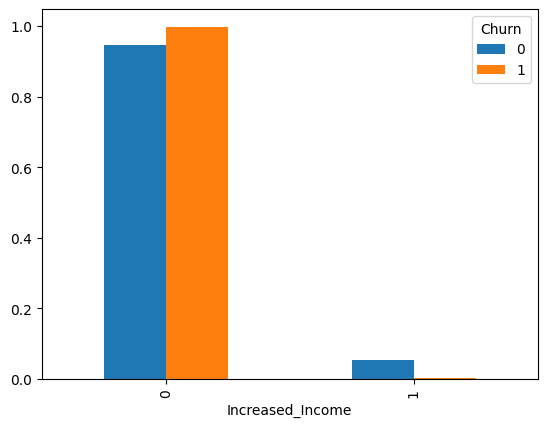

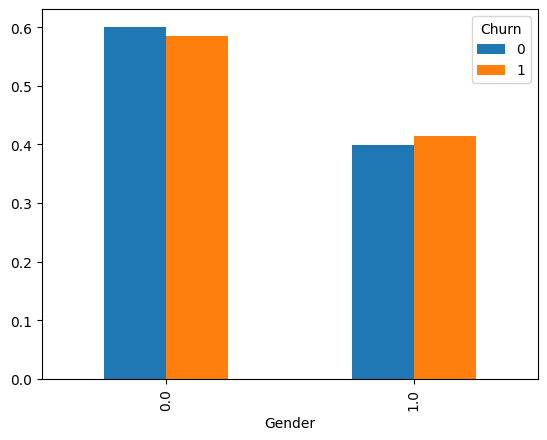

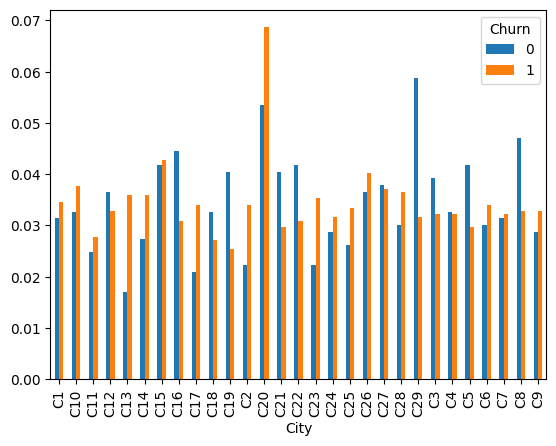

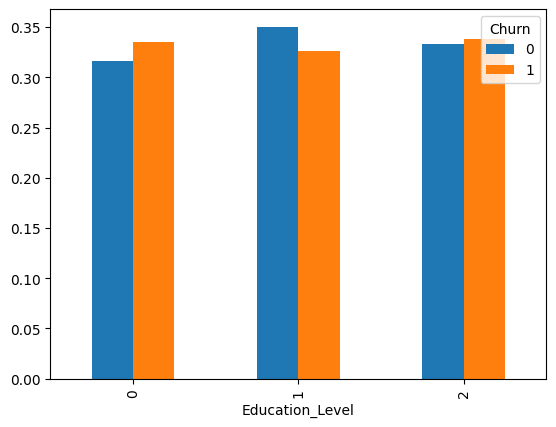

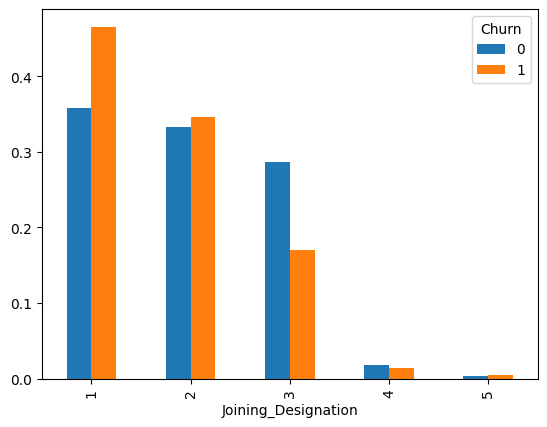

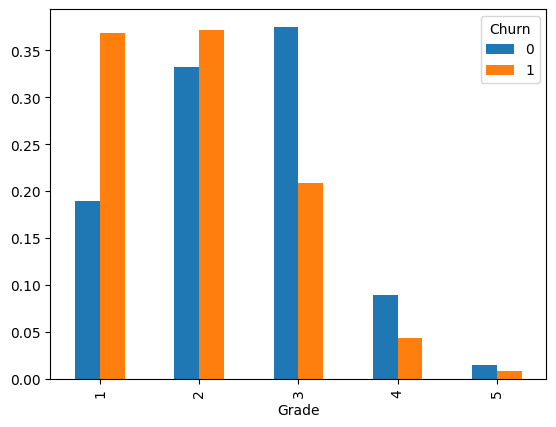

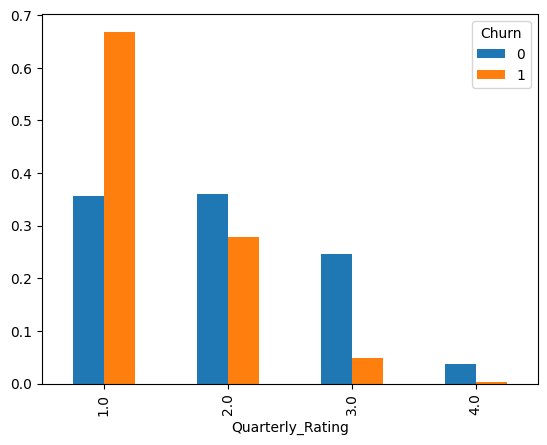

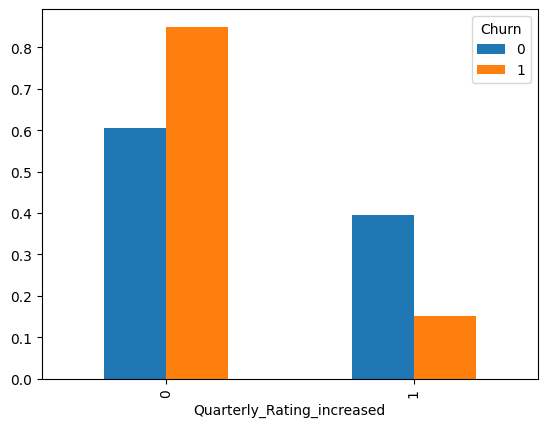

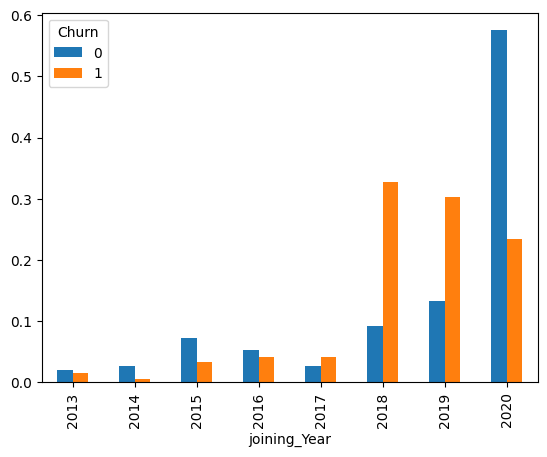

In [ ]:
categorical_features = ['Increased_Income', 'Gender','City','Education_Level',
                   'Joining_Designation','Grade','Quarterly_Rating','Quarterly_Rating_increased',"joining_Year"]

for col in categorical_features:
    pd.crosstab(index = Mdata[col],
               columns = Mdata["Churn"],
               normalize="columns").plot(kind = "bar")
    plt.show()

In [ ]:
Mdata.isna().sum()

Increased_Income                0
LastWorkingDate_x             765
No_of_Records                   0
Age                             0
City                            0
Education_Level                 0
Income                          0
Joining_Designation             0
Grade                           0
Total_Business_Value            0
Quarterly_Rating                0
Gender                         45
Churn                           0
joining_Year                    0
Quarterly_Rating_increased      0
Driver_tenure_days              0
dtype: int64

## SimpleImputer

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy='most_frequent')

In [ ]:
Mdata["Gender"] = imputer.fit_transform(X=Mdata["Gender"].values.reshape(-1,1),y=Mdata["Churn"].values.reshape(-1,1))

In [ ]:
Mdata["Gender"].value_counts(dropna=False)

Gender
0.0    1425
1.0     956
Name: count, dtype: int64

In [ ]:
Mdata.isna().sum()

Increased_Income                0
LastWorkingDate_x             765
No_of_Records                   0
Age                             0
City                            0
Education_Level                 0
Income                          0
Joining_Designation             0
Grade                           0
Total_Business_Value            0
Quarterly_Rating                0
Gender                          0
Churn                           0
joining_Year                    0
Quarterly_Rating_increased      0
Driver_tenure_days              0
dtype: int64

## TargetEncoder

In [ ]:
#!pip install category_encoders

from category_encoders import TargetEncoder

TE = TargetEncoder()

In [ ]:
Mdata["City"] = TE.fit_transform(X = Mdata["City"],y = Mdata["Churn"])

In [ ]:
Mdata["joining_Year"] = TE.fit_transform(X = Mdata["joining_Year"],y = Mdata["Churn"])

In [ ]:
Mdata

,Increased_Income,LastWorkingDate_x,No_of_Records,Age,City,Education_Level,Income,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating,Gender,Churn,joining_Year,Quarterly_Rating_increased,Driver_tenure_days
0,0,03/11/19,01/01/19,28.0,0.769859,2,57387.0,1,1,1715580,2.0,0.0,1,2018,0,77
1,0,NaN,11/01/20,31.0,0.684190,2,67016.0,2,2,0,1.0,0.0,0,2020,0,207
2,0,27/04/20,12/01/19,43.0,0.816064,2,65603.0,2,2,350000,1.0,0.0,1,2019,0,142
3,0,03/07/19,01/01/19,29.0,0.706553,0,46368.0,1,1,120360,1.0,0.0,1,2019,0,57
4,0,NaN,08/01/20,31.0,0.702829,1,78728.0,3,3,1265000,2.0,1.0,0,2020,1,305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,0,NaN,01/01/19,34.0,0.698531,0,82815.0,2,3,21748820,3.0,0.0,0,2015,1,2056
2377,0,28/10/20,08/01/20,34.0,0.706553,0,12105.0,1,1,0,1.0,1.0,1,2020,0,61
2378,0,22/09/19,01/01/19,45.0,0.570044,0,35370.0,2,2,2815090,2.0,0.0,1,2018,0,418
2379,0,20/06/19,01/01/19,28.0,0.730263,2,69498.0,1,1,977830,2.0,1.0,1,2018,0,334


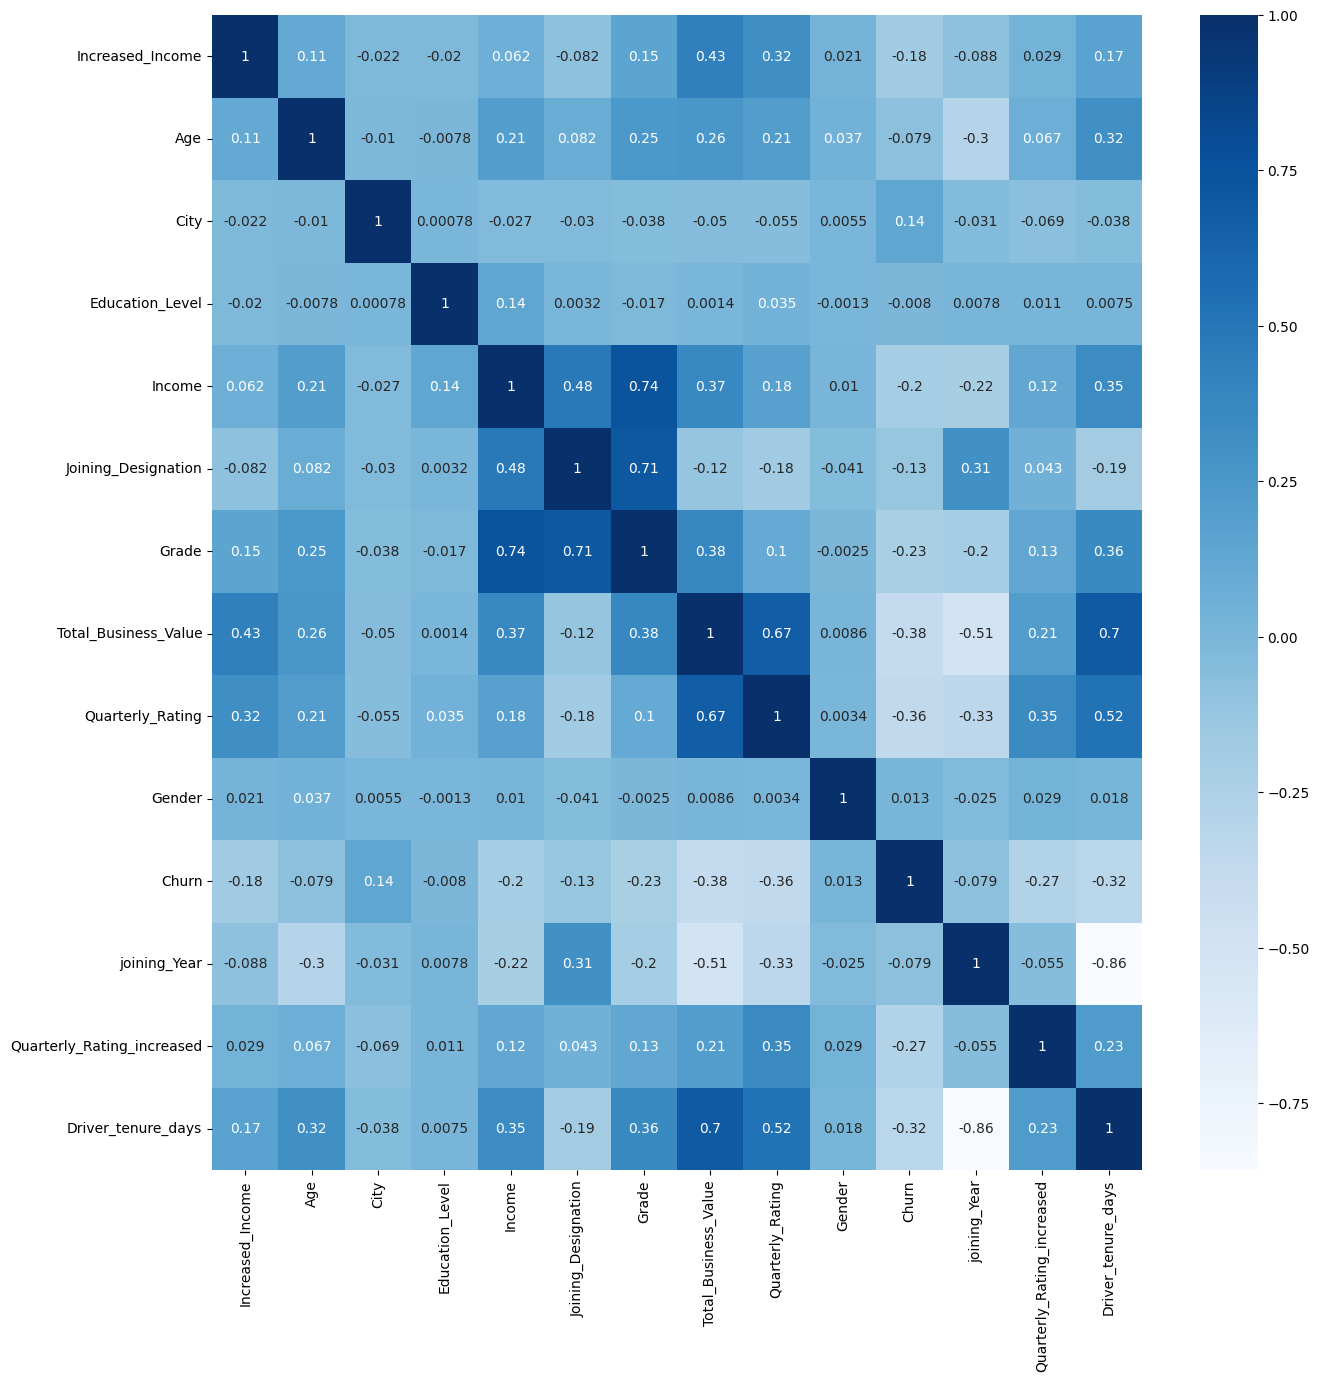

In [ ]:
Mdata.drop(["LastWorkingDate_x","No_of_Records"],inplace=True,axis = 1)

plt.figure(figsize=(15, 15))
sns.heatmap(Mdata.corr(),annot=True, cmap="Blues", annot_kws={"size":10});

sns.heatmap(Mdata.corr())

## Model Building

In [ ]:
X = Mdata.drop(["Churn"],axis = 1)
y = Mdata["Churn"]

## KNNImputer

In [ ]:
import numpy as np
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)



In [ ]:
X = pd.DataFrame(imputer.fit_transform(X),columns=X.columns)

In [ ]:
X

,Increased_Income,Age,City,Education_Level,Income,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating,Gender,joining_Year,Quarterly_Rating_increased,Driver_tenure_days
0,0.0,28.0,0.769859,2.0,57387.0,1.0,1.0,1715580.0,2.0,0.0,2018.0,0.0,77.0
1,0.0,31.0,0.684190,2.0,67016.0,2.0,2.0,0.0,1.0,0.0,2020.0,0.0,207.0
2,0.0,43.0,0.816064,2.0,65603.0,2.0,2.0,350000.0,1.0,0.0,2019.0,0.0,142.0
3,0.0,29.0,0.706553,0.0,46368.0,1.0,1.0,120360.0,1.0,0.0,2019.0,0.0,57.0
4,0.0,31.0,0.702829,1.0,78728.0,3.0,3.0,1265000.0,2.0,1.0,2020.0,1.0,305.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,0.0,34.0,0.698531,0.0,82815.0,2.0,3.0,21748820.0,3.0,0.0,2015.0,1.0,2056.0
2377,0.0,34.0,0.706553,0.0,12105.0,1.0,1.0,0.0,1.0,1.0,2020.0,0.0,61.0
2378,0.0,45.0,0.570044,0.0,35370.0,2.0,2.0,2815090.0,2.0,0.0,2018.0,0.0,418.0
2379,0.0,28.0,0.730263,2.0,69498.0,1.0,1.0,977830.0,2.0,1.0,2018.0,0.0,334.0


In [ ]:
X.describe()

,Increased_Income,Age,City,Education_Level,Income,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating,Gender,joining_Year,Quarterly_Rating_increased,Driver_tenure_days
count,2381.000000,2381.000000,2381.000000,2381.00000,2381.000000,2381.000000,2381.000000,2.381000e+03,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000
mean,0.018480,33.663167,0.678662,1.00756,59232.460484,1.820244,2.097018,4.586742e+06,1.573289,0.401512,2018.536329,0.228895,485.934481
std,0.134706,5.983375,0.065356,0.81629,28298.214012,0.841433,0.941702,9.127115e+06,0.745987,0.490307,1.609597,0.420210,586.243860
min,0.000000,21.000000,0.531324,0.00000,10747.000000,1.000000,1.000000,-1.385530e+06,1.000000,0.000000,2013.000000,0.000000,0.000000
25%,0.000000,29.000000,0.634237,0.00000,39104.000000,1.000000,1.000000,0.000000e+00,1.000000,0.000000,2018.000000,0.000000,129.000000
50%,0.000000,33.000000,0.698531,1.00000,55285.000000,2.000000,2.000000,8.176800e+05,1.000000,0.000000,2019.000000,0.000000,249.000000
75%,0.000000,37.000000,0.719430,2.00000,75835.000000,2.000000,3.000000,4.173650e+06,2.000000,1.000000,2020.000000,0.000000,549.000000
max,1.000000,58.000000,0.816064,2.00000,188418.000000,5.000000,5.000000,9.533106e+07,4.000000,1.000000,2020.000000,1.000000,2983.000000


## Train_Test_split

In [ ]:
from sklearn.model_selection import train_test_split

X_train , X_test, y_train ,y_test = train_test_split(X,y,
                                                    random_state=5,
                                                    test_size=0.2)

In [ ]:
y.value_counts()

Churn
1    1616
0     765
Name: count, dtype: int64

In [ ]:
765 + 1616

2381

## StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train)


StandardScaler()

In [ ]:
X_train = scaler.transform(X_train)
X_test =  scaler.transform(X_test)

## RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RF = RandomForestClassifier(n_estimators=100,
    criterion='entropy',
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight="balanced",
    ccp_alpha=0.0085,
    max_samples=None,)

In [ ]:
RF.fit(X_train,y_train)

RandomForestClassifier(ccp_alpha=0.0085, class_weight='balanced',
                       criterion='entropy', max_depth=10)

In [ ]:
RF.score(X_train,y_train),RF.score(X_test,y_test)

(0.9522058823529411, 0.9329140461215933)

In [ ]:
RF.feature_importances_

array([2.08568044e-03, 9.23436159e-03, 9.48812805e-03, 8.08979746e-04,
       1.62602017e-02, 1.72982028e-02, 1.51890397e-02, 1.74103994e-01,
       5.73059138e-02, 2.22705180e-04, 2.31251824e-01, 2.66784224e-02,
       4.40072547e-01])

In [ ]:
X.columns

Index(['Increased_Income', 'Age', 'City', 'Education_Level', 'Income',
       'Joining_Designation', 'Grade', 'Total_Business_Value',
       'Quarterly_Rating', 'Gender', 'joining_Year',
       'Quarterly_Rating_increased', 'Driver_tenure_days'],
      dtype='object')

<Axes: >

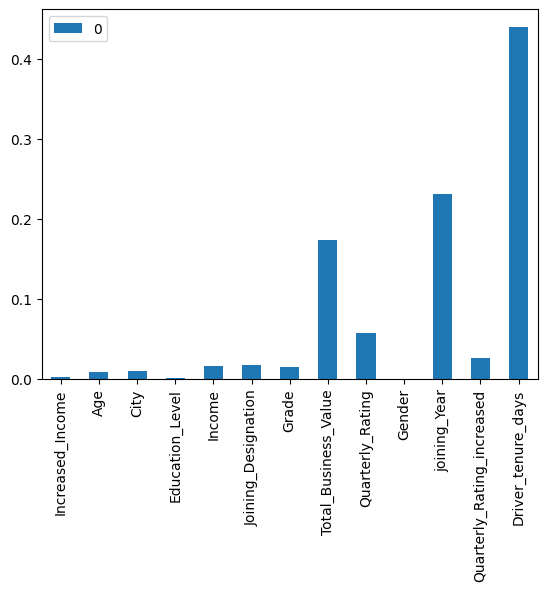

In [ ]:
pd.DataFrame(data=RF.feature_importances_,
            index=X.columns).plot(kind="bar")

In [ ]:
from sklearn.metrics import f1_score , precision_score, recall_score,confusion_matrix



In [ ]:
confusion_matrix(y_test,RF.predict(X_test) )

array([[158,   4],
       [ 28, 287]], dtype=int64)

In [ ]:
confusion_matrix(y_train,RF.predict(X_train) )

array([[ 593,   10],
       [  81, 1220]], dtype=int64)

In [ ]:
f1_score(y_test,RF.predict(X_test)),f1_score(y_train,RF.predict(X_train))

(0.9471947194719472, 0.9640458316870802)

In [ ]:
precision_score(y_test,RF.predict(X_test)),precision_score(y_train,RF.predict(X_train))

(0.9862542955326461, 0.991869918699187)

In [ ]:
recall_score(y_test,RF.predict(X_test)),recall_score(y_train,RF.predict(X_train))

(0.9111111111111111, 0.9377401998462721)

## GridSearchCV - on RandomForestClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

parameters = {"max_depth":[7,10,15],
             "n_estimators":[100,200,300,400],
             "max_features":[4,7,10],
             "ccp_alpha":[0.0005,0.00075,0.001]}

RFC = RandomForestClassifier()
grid_search = GridSearchCV(
    estimator = RFC,
    param_grid = parameters,
    scoring = "accuracy",
    n_jobs = -1,
    refit=True,                   # need not to train again after grid search
    cv=3,
    pre_dispatch='2*n_jobs',
    return_train_score=False)


In [ ]:
grid_search.fit(X_train,y_train.values.ravel())


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'ccp_alpha': [0.0005, 0.00075, 0.001],
                         'max_depth': [7, 10, 15], 'max_features': [4, 7, 10],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='accuracy')

In [ ]:
grid_search.best_estimator_

RandomForestClassifier(ccp_alpha=0.0005, max_depth=15, max_features=10,
                       n_estimators=200)

In [ ]:
grid_search.best_score_

0.9674433046026976

In [ ]:
grid_search.best_params_

{'ccp_alpha': 0.0005, 'max_depth': 15, 'max_features': 10, 'n_estimators': 200}

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100,
    criterion='entropy',
    max_depth=7,
    min_samples_split=2,
    min_samples_leaf=1,

    class_weight="balanced",
    ccp_alpha=0.0001,
    max_samples=None)

In [ ]:
RF.fit(X_train , y_train)

RandomForestClassifier(ccp_alpha=0.0001, class_weight='balanced',
                       criterion='entropy', max_depth=7)

In [ ]:
RF.score(X_train,y_train),RF.score(X_test,y_test)

(0.9716386554621849, 0.9329140461215933)

In [ ]:
y_test_pred = RF.predict(X_test)
y_train_pred = RF.predict(X_train)

In [ ]:
f1_score(y_test,y_test_pred),f1_score(y_train,y_train_pred)


(0.9477124183006536, 0.9788732394366197)

In [ ]:
precision_score(y_test,y_test_pred),precision_score(y_train,y_train_pred)


(0.9764309764309764, 0.9968127490039841)

In [ ]:
recall_score(y_test,y_test_pred),recall_score(y_train,y_train_pred)

(0.9206349206349206, 0.9615680245964643)

## BaggingClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

bagging_classifier_model = BaggingClassifier(DecisionTreeClassifier(max_depth=7,
                                                                                    class_weight="balanced"),
                                            n_estimators=50,
                                            max_samples=1.0,
                                            max_features=1.0,
                                            bootstrap=True,
                                            bootstrap_features=False,
                                            oob_score=False,
                                            warm_start=False,
                                            n_jobs=None,
                                            random_state=None,
                                            verbose=0)


In [ ]:
bagging_classifier_model.fit(X_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                   max_depth=7),
                  n_estimators=50)

In [ ]:

from sklearn.metrics import f1_score , precision_score, recall_score,confusion_matrix


In [ ]:
y_test_pred = bagging_classifier_model.predict(X_test)
y_train_pred = bagging_classifier_model.predict(X_train)

In [ ]:

confusion_matrix(y_test,y_test_pred)

array([[157,   5],
       [ 15, 300]], dtype=int64)

In [ ]:

confusion_matrix(y_train,y_train_pred)

array([[ 596,    7],
       [  33, 1268]], dtype=int64)

In [ ]:
f1_score(y_test,y_test_pred),f1_score(y_train,y_train_pred)


(0.967741935483871, 0.984472049689441)

In [ ]:
precision_score(y_test,y_test_pred),precision_score(y_train,y_train_pred)


(0.9836065573770492, 0.9945098039215686)

In [ ]:

recall_score(y_test,y_test_pred),recall_score(y_train,y_train_pred)

(0.9523809523809523, 0.9746348962336664)

In [ ]:
bagging_classifier_model.score(X_test,y_test)

0.9580712788259959

In [ ]:
bagging_classifier_model.score(X_train,y_train)

0.9789915966386554

In [ ]:
#!pip install xgboost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

parameters = {"max_depth":[2,4,6,10],
             "n_estimators":[100,200,300,400]    }


grid_search = GridSearchCV(
    estimator = XGBClassifier(),
    param_grid = parameters,
    scoring = "accuracy",
    n_jobs = -1,
    refit=True,                   # need not to train again after grid search
    cv=3,
    pre_dispatch='2*n_jobs',
    return_train_score=False)


grid_search.fit(X_train,y_train.values.ravel())

grid_search.best_estimator_

grid_search.best_score_

grid_search.best_params_

{'max_depth': 2, 'n_estimators': 400}

In [ ]:
xgb = XGBClassifier(n_estimators=100,
                   max_depth = 2)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_test_pred = xgb.predict(X_test)
y_train_pred = xgb.predict(X_train)

In [ ]:
confusion_matrix(y_test,y_test_pred)

array([[157,   5],
       [ 11, 304]], dtype=int64)

In [ ]:
confusion_matrix(y_train,y_train_pred)

array([[ 600,    3],
       [  13, 1288]], dtype=int64)

In [ ]:
xgb.score(X_train,y_train),xgb.score(X_test,y_test)

(0.9915966386554622, 0.9664570230607966)

In [ ]:
f1_score(y_test,y_test_pred),f1_score(y_train,y_train_pred)


(0.9743589743589743, 0.9938271604938271)

In [ ]:

recall_score(y_test,y_test_pred),recall_score(y_train,y_train_pred)

(0.9650793650793651, 0.9900076863950807)

In [ ]:
precision_score(y_test,y_test_pred),precision_score(y_train,y_train_pred)


(0.9838187702265372, 0.9976762199845082)

In [ ]:
xgb.feature_importances_

array([0.        , 0.01433476, 0.01599837, 0.00293492, 0.01555924,
       0.02272006, 0.04294108, 0.24848855, 0.02160233, 0.01492517,
       0.29111686, 0.10807942, 0.20129934], dtype=float32)

<Axes: >

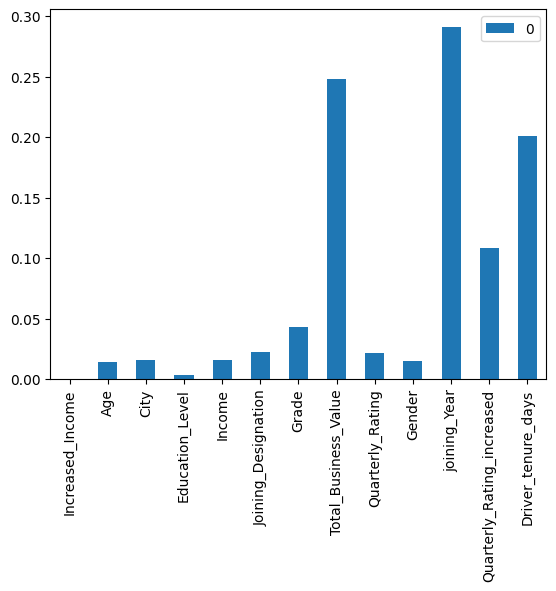

In [ ]:
pd.DataFrame(data=xgb.feature_importances_,
            index=X.columns).plot(kind="bar")

## GradientBoostingClassifier

In [ ]:
def GradientBoostingClassifier(X, y):
    from sklearn.ensemble import  GradientBoostingClassifier
    from sklearn.metrics import f1_score, accuracy_score , roc_auc_score,auc,recall_score,precision_score
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                        y,
                                                        test_size=0.2,
                                                        random_state=1)

    lr = GradientBoostingClassifier()
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    prob = lr.predict_proba(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print('Train Score : ', lr.score(X_train, y_train), '\n')
    print('Test Score : ', lr.score(X_test, y_test), '\n')
    print('Accuracy Score : ', accuracy_score(y_test, y_pred), '\n')
    print(cm, "---> confusion Matrix ", '\n')
    print("ROC-AUC score  test dataset:  ", roc_auc_score(y_test, prob[:, 1]),'\n')
    print("precision score  test dataset:  ", precision_score(y_test, y_pred),'\n')
    print("Recall score  test dataset:  ", recall_score(y_test, y_pred), '\n')
    print("f1 score  test dataset :  ", f1_score(y_test, y_pred), '\n')
    return (prob[:,1], y_test)

In [ ]:
probs , y_test = GradientBoostingClassifier(X,y)

Train Score :  0.9915966386554622 

Test Score :  0.9748427672955975 

Accuracy Score :  0.9748427672955975 

[[143   5]
 [  7 322]] ---> confusion Matrix  

ROC-AUC score  test dataset:   0.9947116569456995 

precision score  test dataset:   0.9847094801223242 

Recall score  test dataset:   0.9787234042553191 

f1 score  test dataset :   0.9817073170731707 



In [ ]:
def plot_pre_curve(y_test,probs):
    from sklearn.metrics import precision_recall_curve
    precision, recall, thresholds = precision_recall_curve(y_test, probs)
    plt.plot([0, 1], [0.5, 0.5], linestyle='--')
    # plot the precision-recall curve for the model
    plt.plot(recall, precision, marker='.')
    plt.title("Precision Recall curve")
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    # show the plot
    plt.show()

def plot_roc(y_test,prob):
    from sklearn.metrics import roc_curve
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    # plot no skill
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    plt.plot(fpr, tpr, marker='.')
    plt.title("ROC curve")
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    # show the plot
    plt.show()

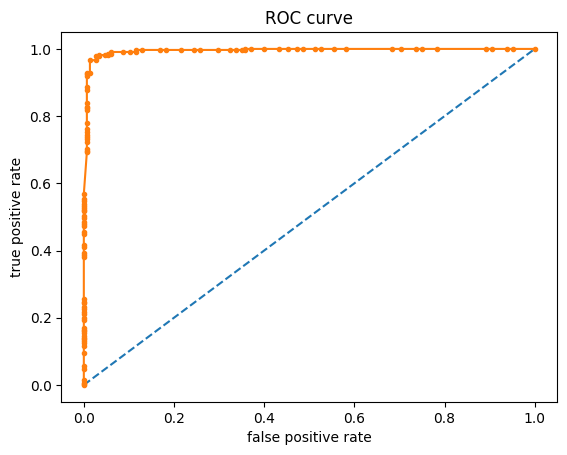

In [ ]:
plot_roc(y_test , probs)

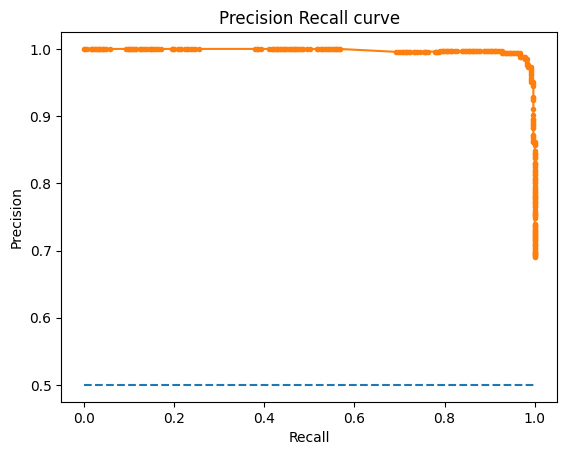

In [ ]:
plot_pre_curve(y_test , probs)

# Inferences :

from data  distribution:
Male      1380
Female     956

Churn : distribution:
1    1616 (67.870%)
0     765 (32.12%)


- Probability of Churn is higher in case of education level 0 and 1 than 2.
- in case of joining destination 1, probability of churn is higher.



- in case of quarterly rating is 1, probability of churn is significantly higher.
- also same pattern is observed in case of when driver's quarterly rating has increased through out tenure.




- due to some reason , for drivers who joined in 2018 and 2019 , probability of churn is very high compare to 2020 and before 2018.



#### Random Forest :
- train and test score : (0.8697478991596639, 0.8679245283018868)
- feature importance : highest is : joining year , followed by No of records available in data, and total business value.
- recall : 0.866
- precision: 0.928
- f1-score : 0.89


#### on Grid Search CV : RF :
- best params : ccp_alpha=0.001, max_depth=10, max_features=7,n_estimators=300
- Gridsearch RF best score : 0.8881417819617973


#### Bagging Classfier : wwith Decision Tree :
- with 50 DTs. when max_depth=7, class_weight="balanced"
- f1 score : 0.9064039408866995
- precision : 0.9387755102040817
- recall_score : 0.8761904761904762
- accuracy: 0.880




#### XGBoost Classifier: (Grid SEARCH CV : ) 'max_depth': 2, 'n_estimators': 100
- test Scores :
- Accuracy : 0.87
- f1 score : 0.90
- recall : 0.923
- precision : 0.884

- feature importance : highest is : joining year , followed by No of records available in data, and total business value.




#### GradientBoostingClassifier : GBDC:

- Train Score :  0.914390756302521
- Test Score :  0.8909853249475891
- Accuracy Score :  0.8909853249475891
- ROC-AUC score  test dataset:   0.9447855910621867
- precision score  test dataset:   0.9287925696594427
- Recall score  test dataset:   0.9118541033434651
- f1 score  test dataset :   0.9202453987730062
















# Insights and Recommendation:


- Out of 2381 drivers 1616 have left the company.
- We need to incentivise the drivers overtime or other perks to overcome churning
- The employees whose quarterly rating has increased are less likely to leave the organization.
- Company needs to implement the reward system for the customer who provide the feedback and rate drivers
- The employees whose monthly salary has not increased are more likely to leave the organization.
- Company needs to get in touch with those drivers whose monthly salary has not increased and help them out to earn more by provider bonus and perks.
- Out of 2381 employees, 1744 employees had their last quarterly rating as 1.
- Out of 2381 employees, the quarterly rating has not increased for 2076 employees. This is red flag for the company which needs to regulate.
- Company needs to look why customers are not rating drivers.
- Last_Quarterly_Rating, Total_Business_Value & Quarterly_Rating_Increased are the most important features. Company needs to tracks these features as predicators
- We observe that we are not getting very high recall on target 0 which may be due to small unbalanced dataset. More data will overcome this issue.
- The Random Forest Classifier attains the Recall score of 91% for the driver who left the company. Which indicates that model is performing the decent job.


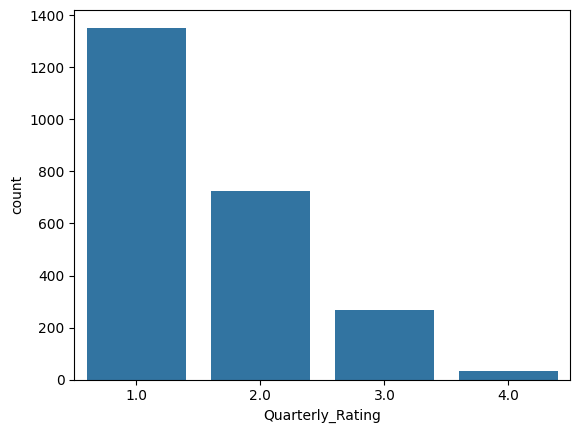

In [ ]:
#What percentage of drivers have received a quarterly rating of 5?
sns.countplot(data = Mdata, x ='Quarterly_Rating');

# COnclusion: None of the drivers in the given data set have received a Quarterly rating of 5.0.

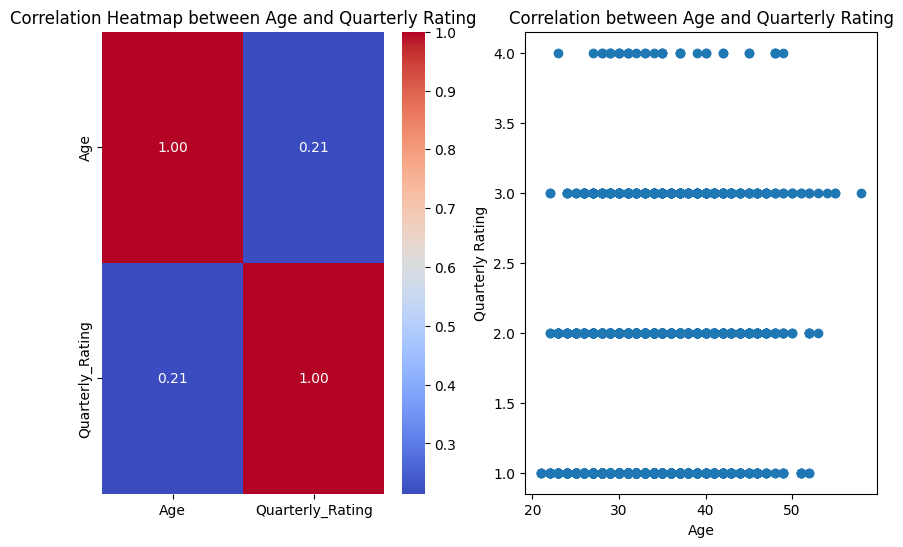

In [ ]:
# 2. Comment on the correlation between Age and Quarterly Rating.

correlation_matrix = Mdata[['Age', 'Quarterly_Rating']].corr()

plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap between Age and Quarterly Rating')

plt.subplot(1,2,2)
plt.scatter(Mdata['Age'], Mdata['Quarterly_Rating'])
plt.xlabel('Age')
plt.ylabel('Quarterly Rating')
plt.title('Correlation between Age and Quarterly Rating')
plt.show()

## Weak Positive Correlation: The correlation coefficient of 0.21 indicates a weak positive linear relationship between Age and Quarterly Rating.
# As the value is positive, it suggests that as Age increases, there tends to be a slight increase in Quarterly Rating on average.

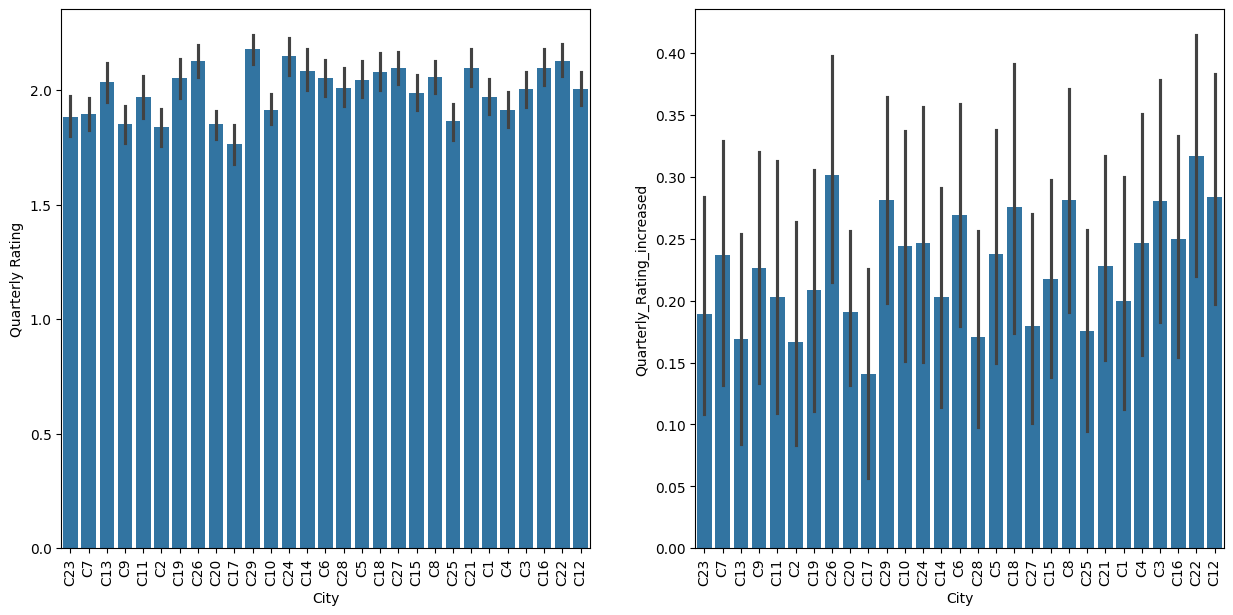

In [ ]:
# 3. Name the city which showed the most improvement in Quarterly Rating over the past year.

plt.figure(figsize = (15,7))
plt.subplot(1,2,1)
sns.barplot(data = df, x = 'City', y = 'Quarterly Rating')
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.barplot(data = data, x = 'City', y = 'Quarterly_Rating_increased')
plt.xticks(rotation = 90);

In [ ]:
sorted_data = data.sort_values(by='Quarterly_Rating_increased', ascending=False)

# Get the city with the highest increase in Quarterly Rating
most_improved_city = sorted_data.iloc[0:2]['City']
most_improved_city

1350     C5
514     C23
Name: City, dtype: object

In [ ]:
# Drivers with a Grade of ‘A’ are more likely to have a higher Total Business Value. (T/F)
# False

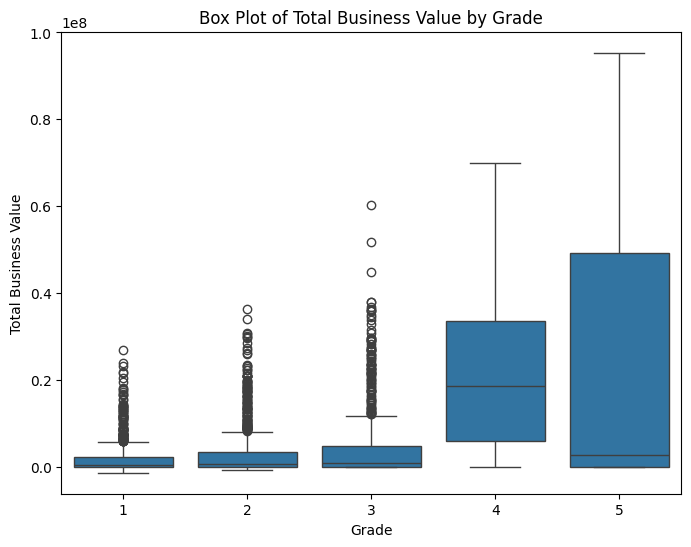

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=Mdata, x='Grade', y='Total_Business_Value')
plt.title('Box Plot of Total Business Value by Grade')
plt.xlabel('Grade')
plt.ylabel('Total Business Value')
plt.show()

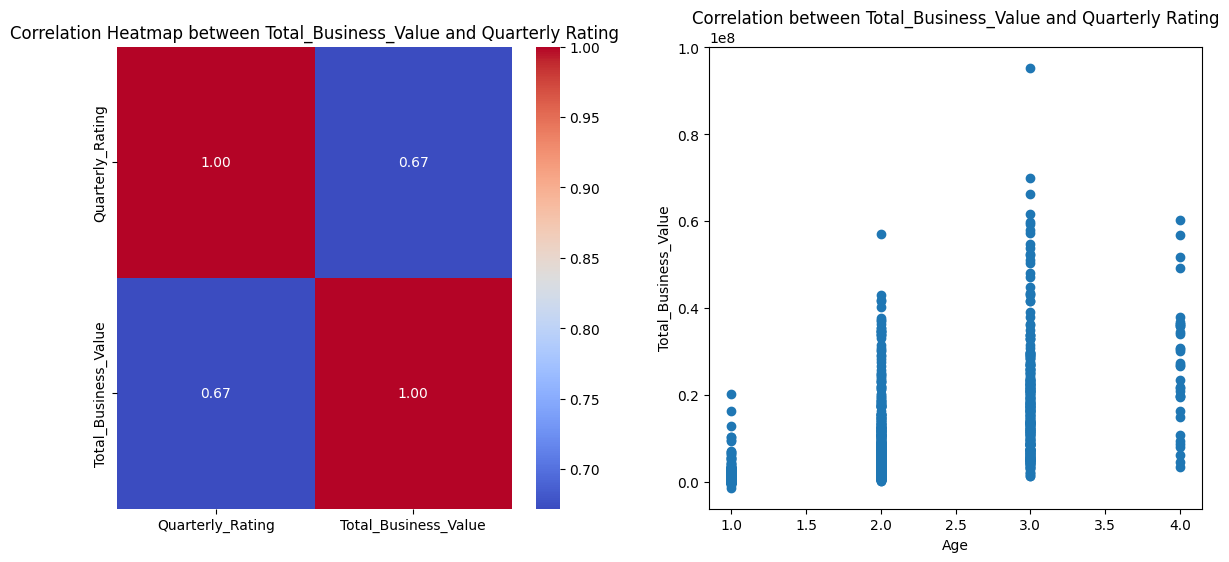

In [ ]:
# If a driver's Quarterly Rating drops significantly, how does it impact their Total Business Value in the subsequent period?
correlation_matrix = Mdata[['Quarterly_Rating', 'Total_Business_Value']].corr()

plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap between Total_Business_Value and Quarterly Rating')

plt.subplot(1,2,2)
plt.scatter(Mdata['Quarterly_Rating'], Mdata['Total_Business_Value'])
plt.xlabel('Age')
plt.ylabel('Total_Business_Value')
plt.title('Correlation between Total_Business_Value and Quarterly Rating')
plt.show()
# Its shows A moderate positive relationship
# If a driver's Quarterly Rating drops significantly, the Total Business Value also drops significantly for the driver.

In [ ]:
data.head()

,Driver_ID,Increased_Income,Gender_x,LastWorkingDate_x,No_of_Records,Age,Gender_y,City,Education_Level,Income,Date_of_joining,LastWorkingDate_y,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating,Gender,Churn,joining_Year,Quarterly_Rating_increased
0,1,0,Male,03/11/19,01/01/19,28.0,Male,C23,2,57387.0,2018-12-24,2019-03-11,1,1,1715580,2.0,Male,1,2018,0
1,2,0,Male,NaN,11/01/20,31.0,Male,C7,2,67016.0,2020-11-06,NaT,2,2,0,1.0,Male,0,2020,0
2,4,0,Male,27/04/20,12/01/19,43.0,Male,C13,2,65603.0,2019-12-07,2020-04-27,2,2,350000,1.0,Male,1,2019,0
3,5,0,Male,03/07/19,01/01/19,29.0,Male,C9,0,46368.0,2019-01-09,2019-03-07,1,1,120360,1.0,Male,1,2019,0
4,6,0,Female,NaN,08/01/20,31.0,Female,C11,1,78728.0,2020-07-31,NaT,3,3,1265000,1.6,Female,0,2020,1


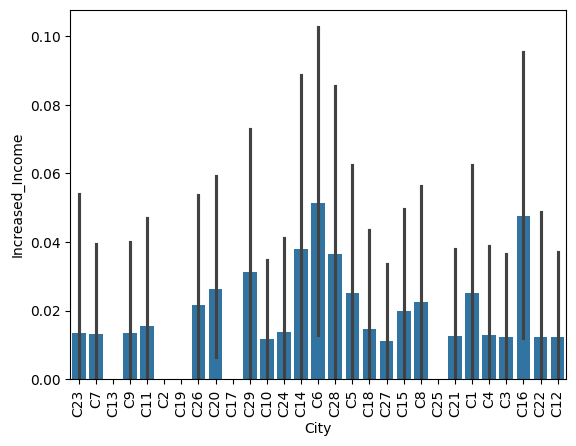

In [ ]:
# 9. Will the driver's performance be affected by the City they operate in? (Yes/No)
sns.barplot(data = data, x ='City', y = 'Increased_Income')
plt.xticks(rotation = 90);

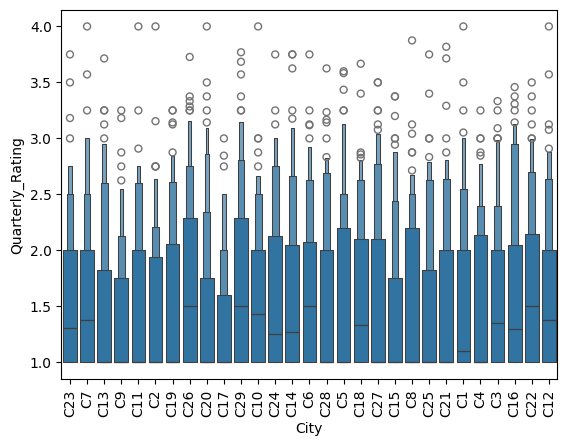

In [ ]:
sns.boxenplot(data = data, x = 'City', y = 'Quarterly_Rating')
plt.xticks(rotation = 90);

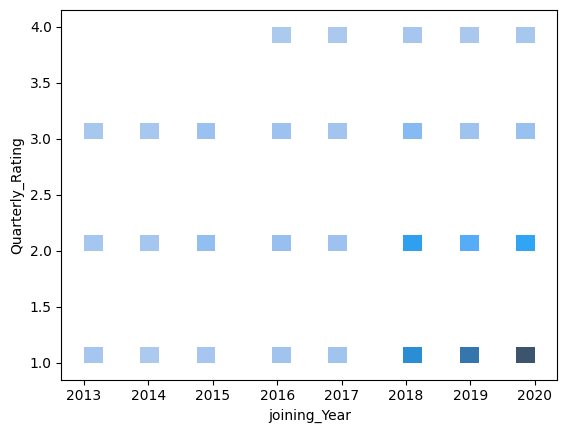

In [ ]:
#  Analyze any seasonality in the driver's ratings. Do certain times of the year
# correspond to higher or lower ratings, and why might that be?
sns.histplot(data = Mdata, x = 'joining_Year', y = 'Quarterly_Rating');

In [ ]:
Mdata['Churn'].value_counts()

Churn
1    1616
0     765
Name: count, dtype: int64